In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import missingno as msno
import warnings
import os
from functools import lru_cache
from math import ceil
from itertools import zip_longest
from typing import List, Tuple, Union, Any
from scipy.stats import chi2_contingency
from itertools import combinations
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import r_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet 
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier  # Make sure CatBoost is imported
from lightgbm import LGBMClassifier
import statsmodels.api as sm
import lightgbm as lgb

In [2]:
data= pd.read_csv("Ames_HousePrice.csv")

In [3]:
data.shape

(2580, 82)

In [4]:
target_name = "SalePrice"
X, y = (
    data.drop(columns = [target_name, 'PID']),
    data[target_name]
)

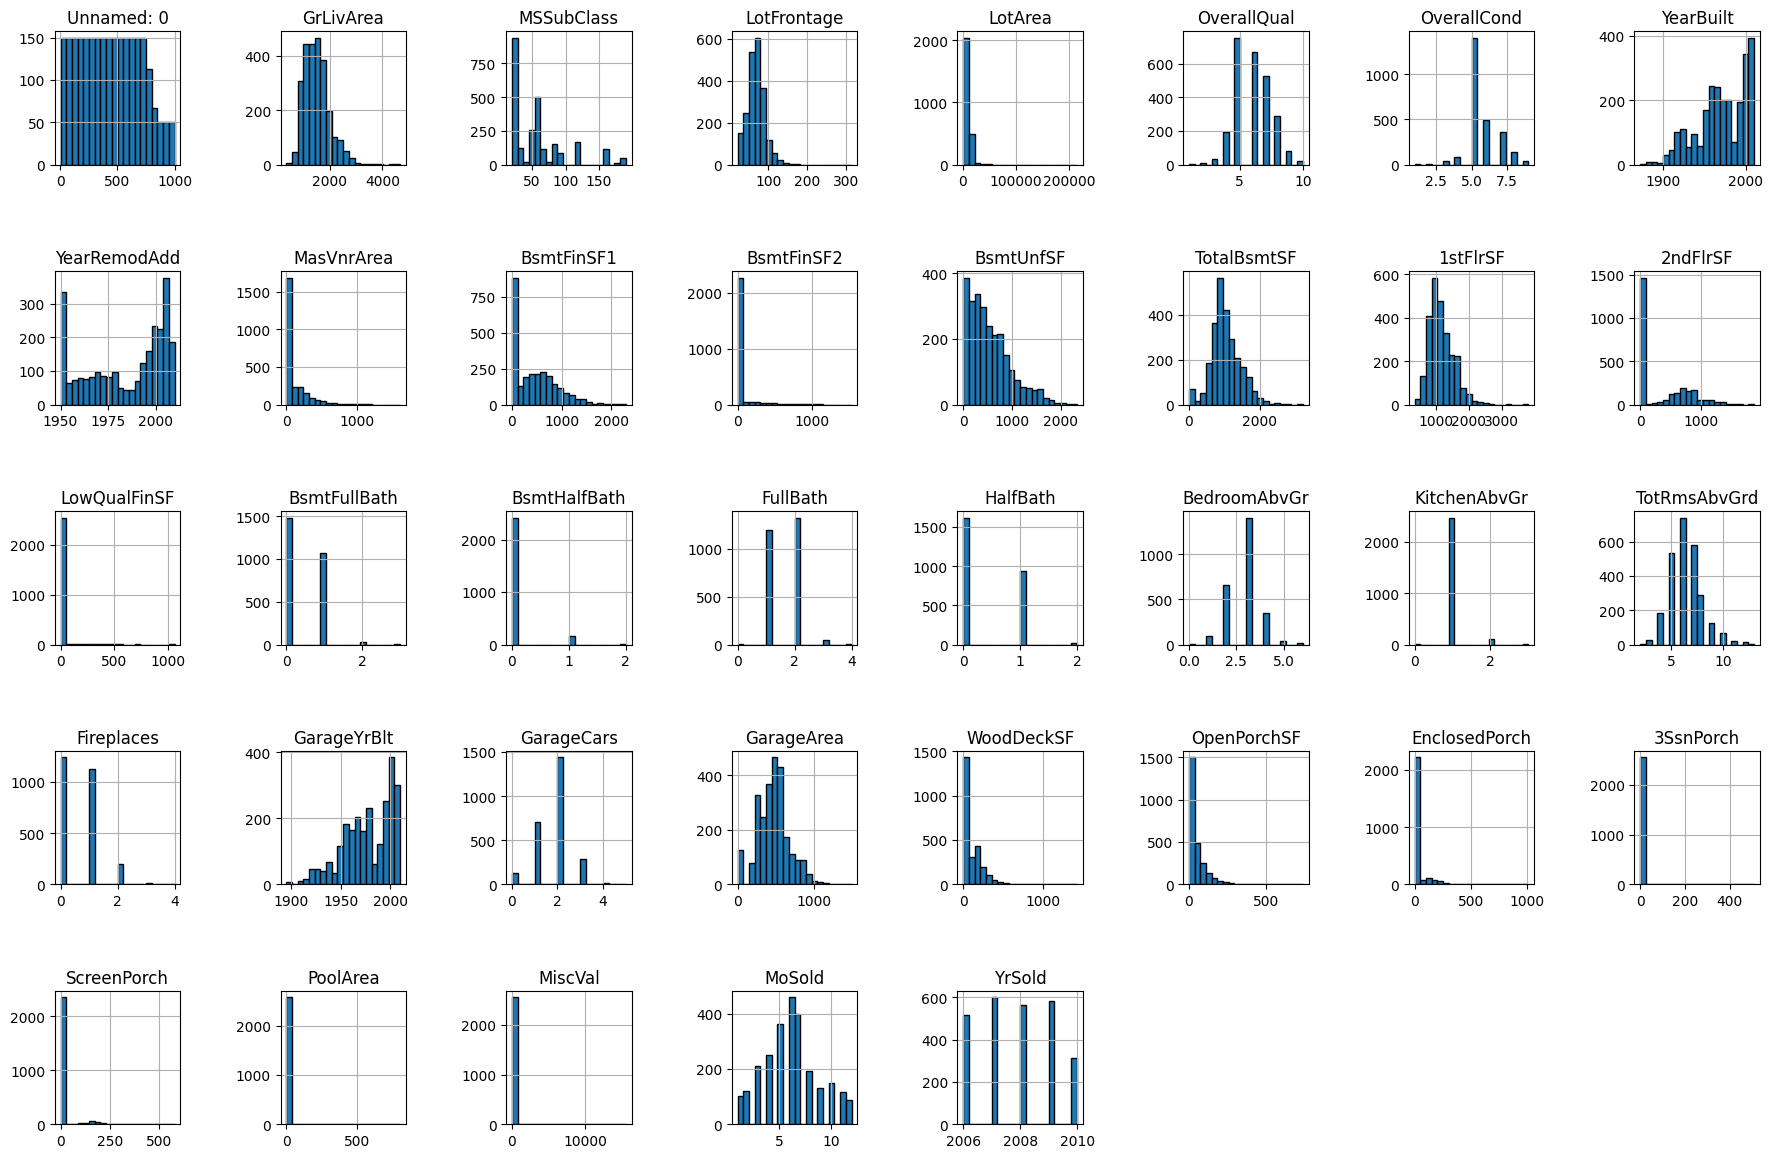

In [5]:
#Univariate and Multivariate Feature Relationships 
def plot_univariate_numerical_features(data: pd.DataFrame, nrow: int = 12, ncol: int = 8, figsize: tuple = (22, 36), bins: int = 20) -> None:
  
    numerical_data = data.select_dtypes(include=['number'])
    
    numerical_data.hist(
        bins=bins, figsize=figsize, edgecolor="black", layout=(nrow, ncol)
    )
    plt.subplots_adjust(hspace=0.8, wspace=0.8)

plot_univariate_numerical_features(X)

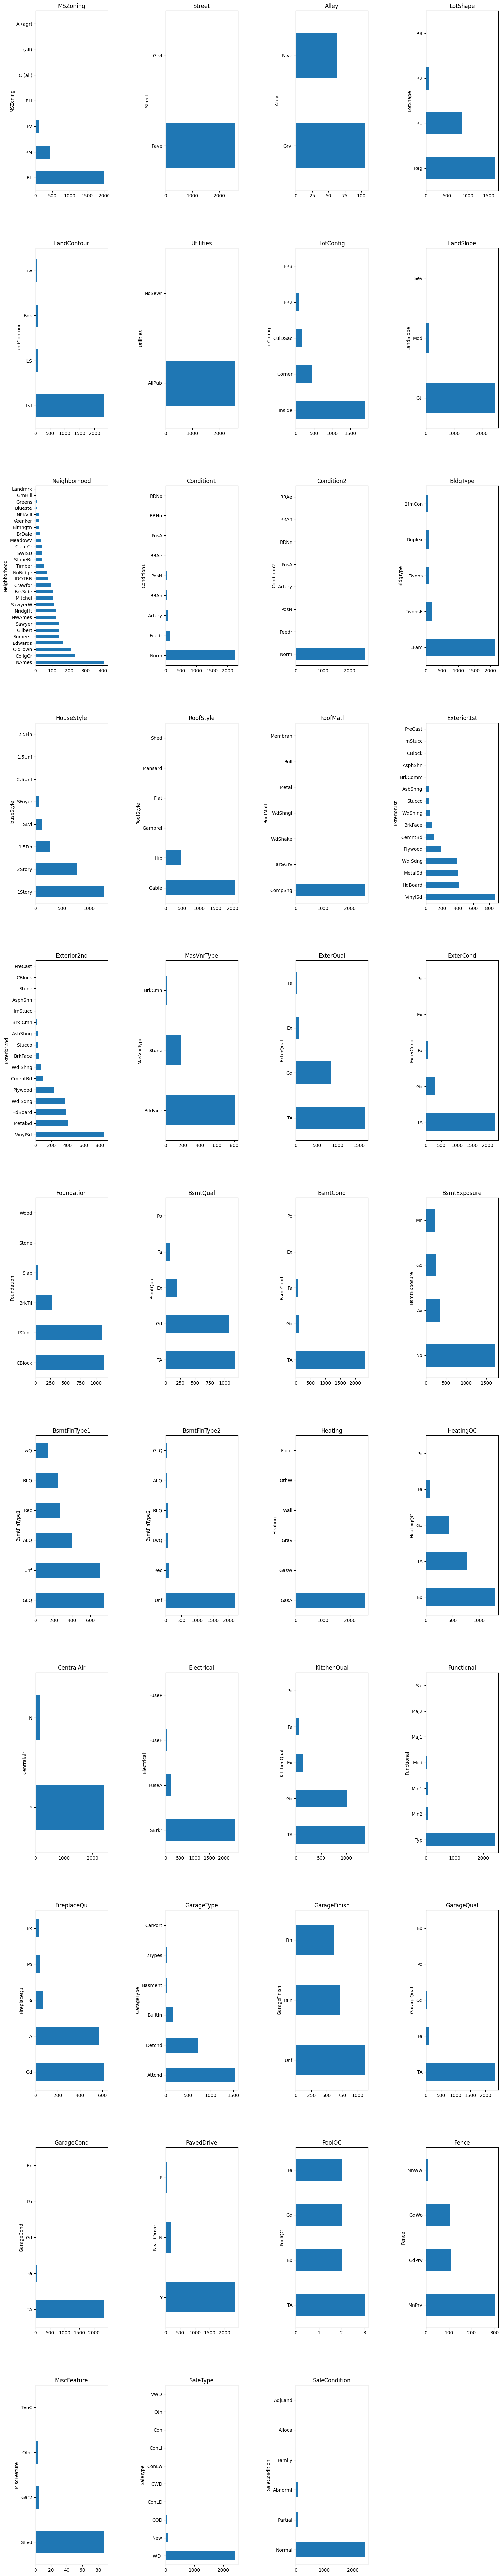

In [6]:
def plot_categorical_features(data: pd.DataFrame, ncol: int = 4, figsize: tuple = (18, 100)) -> None:

    categorical_features = data.select_dtypes(include=['object'])
    n_categorical_features = categorical_features.shape[1]
    nrows = ceil(n_categorical_features / ncol)
    
    fig, axs = plt.subplots(ncols=ncol, nrows=nrows, figsize=figsize)
    
    for feature_name, ax in zip_longest(categorical_features, axs.flatten()):
        if feature_name is None:
            # do not show the axis
            ax.axis("off")
            continue
        
        categorical_features[feature_name].value_counts().plot.barh(ax=ax)
        ax.set_title(feature_name)
    
    plt.subplots_adjust(hspace = 0.32, wspace = 0.8)

# Example usage:
plot_categorical_features(X)